In [2]:
import time
import pyikfastbravo as pyikfast
import yaml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from scipy.spatial.transform import Rotation as R


In [3]:
def read_yaml_file(path):
    with open(path, "r") as stream:
        try:
            data = yaml.safe_load(stream)
            return data
        except:
            return None


In [35]:
ee_positions = read_yaml_file("/home/mmicatka/Documents/ikfast/pyikfast/output/positions.yaml")

In [39]:
poses = list(ee_positions.values())
pose = poses[-1]
matr = R.from_quat(pose[3:])
rot_mat = matr.as_matrix()
target_translation = pose[:3]
target_rotation = list(rot_mat.flatten())

t0 = time.time()
solution = pyikfast.inverse(target_translation, target_rotation)
t1 = time.time() - t0

print(solution)

[[2.362600401861382, 1.7272766525118493, 1.4143160010779408, -0.6330473103911651, 0.0, 1.7168331919201747], [2.0453600763444175, 1.727276652511852, 1.4143160010779414, 0.6330480315858708, -7.105427357601002e-15, -2.983016447765408]]


In [40]:
poses = list(ee_positions.values())
num_poses = len(poses)
times = []
successes = []

for i in range(1000):
    idx = np.random.randint(0, num_poses)
    pose = poses[idx]
    matr = R.from_quat(pose[3:])
    rot_mat = matr.as_matrix()
    target_translation = pose[:3]
    target_rotation = list(rot_mat.flatten())#[1, 0, 0, 0, 1, 0, 0, 0, 1]

    t0 = time.time()
    solution = pyikfast.inverse(target_translation, target_rotation)
    t1 = time.time() - t0

    times.append(t1)
    successes.append(len(solution) > 0)

times = np.array(times)
successes = np.array(successes)

In [41]:
print(1000*times.mean())
print(np.sum(successes))

0.07586884498596191
227


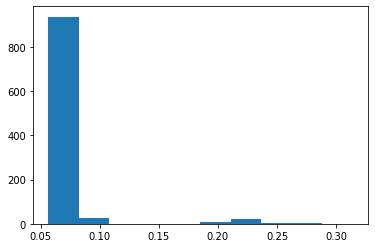

In [42]:
plt.hist(1000*times)
plt.show()

In [ ]:
num_bins = 50
